## Motor erf HNN-modeling and optimization

Motor ERF from button press experiment -response time-locked, from Bonaiuto et al. 2018

HNN-core parameters optimization protocol from: https://jonescompneurolab.github.io/hnn-core

## Plot & Record laminar contributions, extracellular potentials to the MERF
from tutorial https://jonescompneurolab.github.io/hnn-core/stable/auto_examples/howto/plot_record_extracellular_potentials.html#sphx-glr-auto-examples-howto-plot-record-extracellular-potentials-py

In [1]:
import os
import json
import numpy as np

from model_merf import set_params

from hnn_core import read_dipole, simulate_dipole, MPIBackend, JoblibBackend, law_2021_model
from hnn_core.dipole import average_dipoles, plot_dipole
from matplotlib import pyplot as plt

In [2]:
%env OMPI_TMPDIR=/scratch
%env TMPDIR=/scratch

env: OMPI_TMPDIR=/scratch
env: TMPDIR=/scratch


In [3]:
%env TMPDIR

'/scratch'

In [4]:
base_data_dir='/home/bonaiuto/laminar_csd/data'
subject='sub-001'
session='ses-01'
c_idx=3
epoch='motor'
data_dir=os.path.join(base_data_dir, subject, session)
hnn_dir=os.path.join(data_dir, f'{subject}_{session}_c{c_idx}_{epoch}_hnn')

In [5]:
with open(os.path.join(hnn_dir, f'{subject}_{session}_c{c_idx}_{epoch}_erf_opt_params.json'), 'r') as f:
    optim_params = json.load(f)

In [6]:
net = law_2021_model()
net = set_params(net, optim_params, sim_shank=True)

Setting parameters: {'evdist2_ampa_L2_basket': 0.24835830561354402, 'evdist2_ampa_L2_pyramidal': 0.2350467438599327, 'evdist2_ampa_L5_pyramidal': 0.24908280173436617, 'evdist2_nmda_L2_basket': 0.5534423950668973, 'evdist2_nmda_L2_pyramidal': 0.1121530915911214, 'evdist2_nmda_L5_pyramidal': 0.0329964418967209, 'evdist2_mu': 939.6502269218001, 'evdist2_sigma': 12.903601741239173, 'evprox1_ampa_L2_basket': 0.10920206680436437, 'evprox1_ampa_L2_pyramidal': 0.21531304587194455, 'evprox1_ampa_L5_basket': 0.2012493295364233, 'evprox1_ampa_L5_pyramidal': 0.2959488249447399, 'evprox1_nmda_L2_basket': 0.991108731278414, 'evprox1_nmda_L2_pyramidal': 0.5597909596395656, 'evprox1_nmda_L5_basket': 0.3666480858640013, 'evprox1_nmda_L5_pyramidal': 0.6427178005880251, 'evprox1_mu': 1017.2183589419386, 'evprox1_sigma': 26.574367387643132, 'evdist3_ampa_L2_basket': 0.02, 'evdist3_ampa_L2_pyramidal': 0.2, 'evdist3_ampa_L5_pyramidal': 0.1, 'evdist3_nmda_L2_basket': 0.01, 'evdist3_nmda_L2_pyramidal': 0.08, 

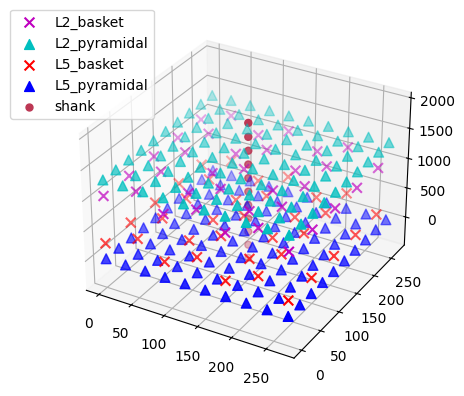

In [7]:
fig = net.plot_cells()
fig.savefig('cell_layout.pdf')

In [8]:
n_trials = 10
tstop = 2000
window_len, scaling_factor = 30, 1250 #estimated 250,000 cells

In [10]:
with JoblibBackend(n_jobs=30):
    dpls = simulate_dipole(net, tstop=tstop, n_trials=n_trials)

Joblib will run 10 trial(s) in parallel by distributing trials over 30 jobs.
Loading custom mechanism files from /home/bonaiuto/miniconda3/envs/hnn4/lib/python3.12/site-packages/hnn_core/mod/x86_64/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...
Trial 1: 310.0 ms...
Trial 1: 320.0 ms...
Trial 1: 330.0 ms...
Trial 1: 340.0 ms...
Trial 1: 350.0 ms...
Trial 1: 

In [11]:
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)


avg_dpl = average_dipoles(dpls)

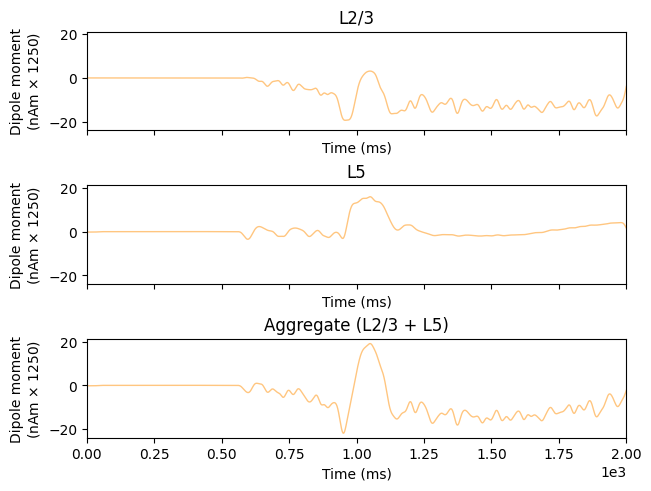

In [12]:
_ = avg_dpl.copy().smooth(
    window_len=window_len).plot(layer=['L2', 'L5', 'agg'],
                                show=False, color='darkorange')

In [13]:
avg_dpl.copy().smooth(
    window_len=window_len).write(os.path.join(hnn_dir, f"dipole_merf_{n_trials}t.txt"))

/home/bonaiuto/miniconda3/envs/hnn4/lib/python3.12/site-packages/hnn_core/dipole.py:682: UserWarning: Saving Dipole to file that is an average of 10 trials
  warnings.warn("Saving Dipole to file that is an average of %d"


In [14]:
def plot_mean_lfp(self, *, trial_no=None, contact_no=None, tmin=None, tmax=None,
             ax=None, decim=None, color='cividis', voltage_offset=50,
             voltage_scalebar=200, show=True, mean=False):
    """mean_across_trials : bool
        If True, average the voltage traces across all selected trials before plotting."""
    
    from hnn_core.viz import plot_laminar_lfp
    from hnn_core.extracellular import _get_laminar_z_coords
    
    if trial_no is None:
        plot_data = self.voltages
    elif isinstance(trial_no, (list, tuple, int, slice)):
        plot_data = self.voltages[trial_no, ]
    else:
        raise ValueError(f'unknown trial number type, got {trial_no}')

    if isinstance(contact_no, (list, tuple, int, slice)):
        plot_data = plot_data[:, contact_no, ]
    elif contact_no is not None:
        raise ValueError(f'unknown contact number type, got {contact_no}')

    contact_labels, _ = _get_laminar_z_coords(self.positions)

    # If mean is True, average the trials
    if mean==True:
        plot_data = plot_data.mean(axis=0)  # Calculate the mean of the trials along the first axis
        fig = plot_laminar_lfp(
                self.times, plot_data, tmin=tmin, tmax=tmax, ax=ax,
                decim=decim, color=color,
                voltage_offset=voltage_offset,
                voltage_scalebar=voltage_scalebar,
                contact_labels=contact_labels,
                show=show)
    else:
        for trial_data in plot_data:
            fig = plot_laminar_lfp(
                self.times, trial_data, tmin=tmin, tmax=tmax, ax=ax,
                decim=decim, color=color,
                voltage_offset=voltage_offset,
                voltage_scalebar=voltage_scalebar,
                contact_labels=contact_labels,
                show=show)
    
    return fig

In [15]:
lfps = net.rec_arrays['shank'].smooth(window_len=window_len)

In [16]:
mean_lfps_traces = lfps.voltages.mean(axis=0)
np.save(os.path.join(hnn_dir, f'merf_lfps_traces_{n_trials}t.npy'), mean_lfps_traces)

In [17]:
lfps_traces = np.load(os.path.join(hnn_dir, f'merf_lfps_traces_{n_trials}t.npy'), allow_pickle=True)

In [18]:
lfps_traces.shape

(11, 80001)

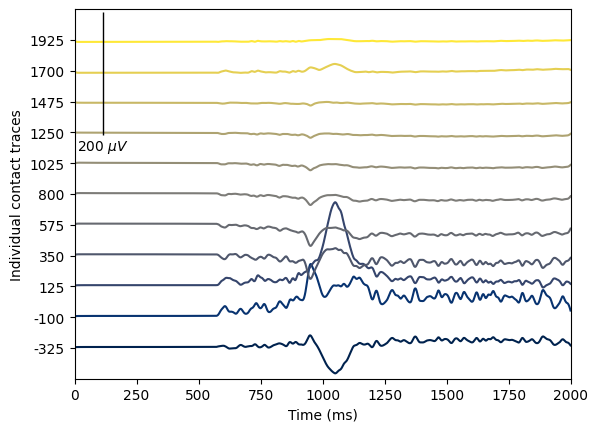

In [19]:
_ = plot_mean_lfp(lfps, trial_no=None, contact_no=None, tmin=None, tmax=None,
             ax=None, decim=None, color='cividis', voltage_offset=50,
             voltage_scalebar=200, show=True, mean=True)

In [20]:
def plt_show(show=True, fig=None, **kwargs):
    """Show a figure while suppressing warnings.

    NB copied from :func:`mne.viz.utils.plt_show`.

    Parameters
    ----------
    show : bool
        Show the figure.
    fig : instance of Figure | None
        If non-None, use fig.show().
    **kwargs : dict
        Extra arguments for :func:`matplotlib.pyplot.show`.
    """
    from matplotlib import get_backend
    import matplotlib.pyplot as plt
    if show and get_backend() != 'agg':
        (fig or plt).show(**kwargs)

In [21]:
def plot_laminar_csd(times, data, contact_labels, ax=None, colorbar=True,
                     vmin=None, vmax=None, sink='b', interpolation='spline',
                     show=True):
    """Plot laminar current source density (CSD) estimation from LFP array.

    Parameters
    ----------
    times : Numpy array, shape (n_times,)
        Sampling times (in ms).
    data : array-like, shape (n_channels, n_times)
        CSD data, channels x time.
    ax : instance of matplotlib figure | None
        The matplotlib axis.
    colorbar : bool
        If True (default), adjust figure to include colorbar.
    contact_labels : list
        Labels associated with the contacts to plot. Passed as-is to
        :func:`~matplotlib.axes.Axes.set_yticklabels`.
    vmin: float, optional
        lower bound of the color axis.
        Will be set automatically of None.
    vmax: float, optional
        upper bound of the color axis.
        Will be set automatically of None.
    sink : str
        If set to 'blue' or 'b', plots sinks in blue and sources in red,
        if set to 'red' or 'r', sinks plotted in red and sources blue.
    interpolation : str | None
        If 'spline', will smoothen the CSD using spline method,
        if None, no smoothing will be applied.

    show : bool
        If True, show the plot.

    Returns
    -------
    fig : instance of matplotlib Figure
        The matplotlib figure handle.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import RectBivariateSpline

    if ax is None:
        _, ax = plt.subplots(1, 1, constrained_layout=True)

    if sink[0].lower() == 'b':
        cmap = "jet"
    elif sink[0].lower() == 'r':
        cmap = "jet_r"
    elif sink[0].lower() != 'b' or sink[0].lower() != 'r':
        raise RuntimeError('Please use sink = "b" or sink = "r".'
                           ' Only colormap "jet" is supported for CSD.')

    if interpolation == 'spline':
        # create interpolation function
        interp_data = RectBivariateSpline(times, contact_labels, data.T)
        # increase number of contacts
        new_depths = np.linspace(contact_labels[0], contact_labels[-1],
                                 contact_labels[-1] - contact_labels[0])
        # interpolate
        data = interp_data(times, new_depths).T
    elif interpolation is None:
        data = data
        new_depths = contact_labels

    # if vmin and vmax are both None, set colormap such that green = zero
    if vmin is None and vmax is None:
        vmin = -np.max(np.abs(data))
        vmax = np.max(np.abs(data))

    im = ax.pcolormesh(times, new_depths, data,
                       cmap=cmap, shading='auto', vmin=vmin, vmax=vmax)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('electrode depth')
    if colorbar:
        color_axis = ax.inset_axes([1.05, 0, 0.02, 1], transform=ax.transAxes)
        plt.colorbar(im, ax=ax, cax=color_axis).set_label(r'$CSD (uV/um^{2})$')

    plt.tight_layout()
    plt_show(show)

    return ax.get_figure()

In [22]:
def plot_mean_csd(self, vmin=None, vmax=None, interpolation='spline',
             sink='b', colorbar=True, ax=None, show=True, mean=False):
    """Plot laminar current source density (CSD) estimation
    mean : bool
    If True, average the voltage traces across all selected trials before plotting.
    """
    # from hnn_core.viz import plot_laminar_csd
    from hnn_core.extracellular import _get_laminar_z_coords, calculate_csd2d

    if mean==True:
        lfp_ = self.voltages
        lfp = lfp_.mean(axis=0)
    else: 
        lfp = self.voltages[0]
        
    contact_labels, delta = _get_laminar_z_coords(self.positions)
    contact_labels=[int(x) for x in contact_labels]
    
    csd_data = calculate_csd2d(lfp_data=lfp,
                               delta=delta)

    fig = plot_laminar_csd(self.times, csd_data,
                               contact_labels=contact_labels, ax=ax,
                               colorbar=colorbar, vmin=vmin, vmax=vmax,
                               interpolation=interpolation, sink=sink,
                               show=show)

    return fig

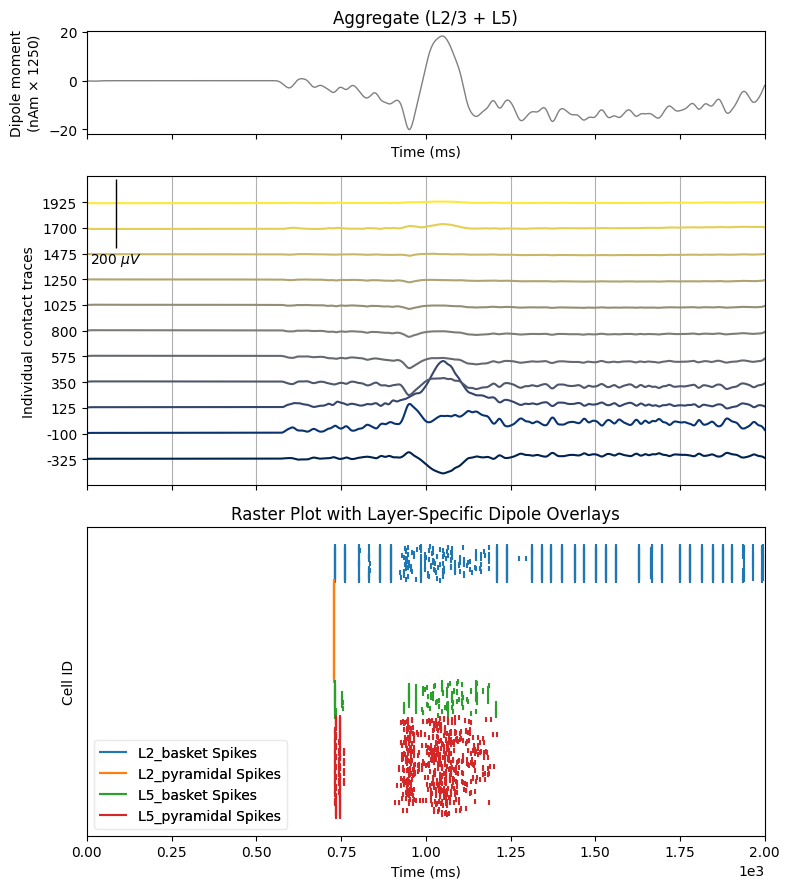

In [24]:
trial_idx = 0
decimate = [5, 4]  # from 40k to 8k to 2k
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 9),
                        gridspec_kw={'height_ratios': [1, 3, 3]})

# Then plot the aggregate dipole time series on its own axis
avg_dpl.smooth(window_len=window_len)
avg_dpl.plot(ax=axs[0], decim=decimate, show=False)

# use the same smoothing window on the LFP traces to allow comparison to dipole
# net.rec_arrays['shank'].smooth(window_len=window_len).plot_lfp(
#     ax=axs[1], decim=decimate, show=False)
_ = plot_mean_lfp(lfps, trial_no=None, contact_no=None,
             decim=None, color='cividis', voltage_offset=75,
             voltage_scalebar=200, show=False, mean=True, ax=axs[1])
axs[1].grid(True, which='major', axis='x')
axs[1].set_xlabel('')
# Add spike raster to subplot
net.cell_response.plot_spikes_raster(trial_idx=trial_idx, ax=axs[2], show=False)
# Finally, add the CSD to the bottom subplot
#net.rec_arrays['shank'].smooth(window_len=window_len).plot_csd(ax=axs[3], show=False)

#_ = plot_mean_csd(lfps, ax=axs[3], mean=True, show=False)

plt.tight_layout()
fig.savefig('trials.pdf')